# Performance comparison of normal KSVD and Approximate KSVD

* [Efficient Implementation of the K-SVD Algorithm
using Batch Orthogonal Matching Pursuit](http://www.cs.technion.ac.il/~ronrubin/Publications/KSVD-OMP-v2.pdf)

In [6]:
import time
import sys

# To load tests module, we need to add parent directory at the beginning of sys.path
sys.path.insert(0, '..')
from spmimage.decomposition import KSVD

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from tests.test_decomposition_ksvd import generate_dictionary_and_samples

def run_ksvd(n_samples, n_features, n_components, k0, max_iter):
    A0, X = generate_dictionary_and_samples(n_samples, n_features, n_components, k0)

    elapsed = []
    error = []
    n_iter = []
    for method in ['normal', 'approximate']:
        start = time.time()
        model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter, method=method)
        model.fit(X)
        elapsed.append(time.time() - start)
        error.append(model.error_[-1])
        n_iter.append(model.n_iter_)
    return elapsed, error, n_iter

def show_results(x, elapsed_times, errors, n_iters):
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    normal_elapsed, approx_elapsed = zip(*elapsed_times)
    plt.plot(x, normal_elapsed, label='normal')
    plt.plot(x, approx_elapsed, label='approximate')
    plt.title('elapsed time')
    plt.legend()    
    
    plt.subplot(1, 3, 2)
    normal_error, approx_error = zip(*errors)
    plt.plot(x, normal_error, label='normal')
    plt.plot(x, approx_error, label='approximate')
    plt.title('error')
    plt.legend()    
    
    plt.subplot(1, 3, 3)
    normal_n_iter, approx_n_iter = zip(*n_iters)
    plt.plot(x, normal_n_iter, label='normal')
    plt.plot(x, approx_n_iter, label='approximate')
    plt.title('iterations')        
    plt.legend()
    
    plt.tight_layout()

## sample size comparison

In [12]:
%%time

# Set Parameters
k0 = 4
n_features = 100
n_components = 10
max_iter = 100

elapsed_times = []
errors = []
n_iters = []

sample_num = range(10, 200, 10)
for n_samples in sample_num:
    elapsed, error, n_iter = run_ksvd(n_samples, n_features, n_components, k0, max_iter)
    elapsed_times.append(elapsed)
    errors.append(error)
    n_iters.append(n_iter)    

/Users/takashi/Documents/workspace-ml/spm-image/examples_venv/lib/python3.5/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


CPU times: user 1min 49s, sys: 1.84 s, total: 1min 51s
Wall time: 1min 51s


CPU times: user 125 ms, sys: 4.19 ms, total: 129 ms
Wall time: 128 ms


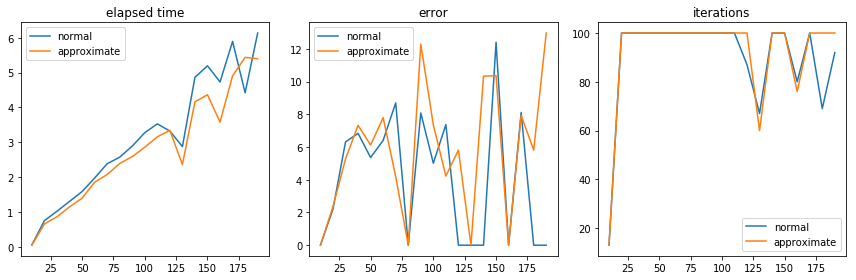

In [20]:
%%time
show_results(sample_num, elapsed_times, errors, n_iters)

## feature size comparison

In [21]:
%%time

# Set Parameters
k0 = 4
n_samples = 100
n_components = 10
max_iter = 100

elapsed_times = []
errors = []
n_iters = []

feature_num = range(10, 200, 10)
for n_features in feature_num:
    elapsed, error, n_iter = run_ksvd(n_samples, n_features, n_components, k0, max_iter)
    elapsed_times.append(elapsed)
    errors.append(error)
    n_iters.append(n_iter)

/Users/takashi/Documents/workspace-ml/spm-image/examples_venv/lib/python3.5/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


CPU times: user 1min 58s, sys: 994 ms, total: 1min 59s
Wall time: 2min 1s


CPU times: user 123 ms, sys: 4.11 ms, total: 127 ms
Wall time: 138 ms


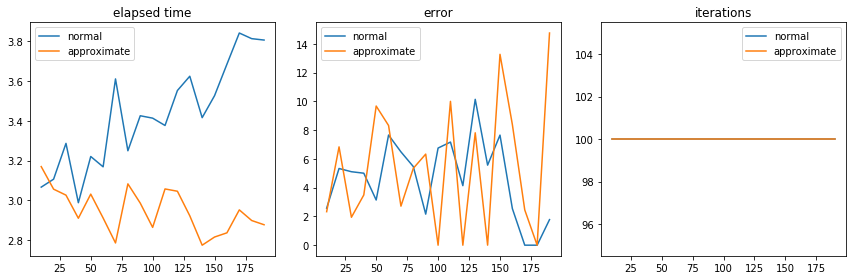

In [22]:
%%time
show_results(sample_num, elapsed_times, errors, n_iters)

## component size comparison

In [23]:
%%time

# Set Parameters
k0 = 4
n_samples = 100
n_features = 100
max_iter = 100

elapsed_times = []
errors = []
n_iters = []

component_num = range(10, 200, 10)
for n_component in component_num:
    elapsed, error, n_iter = run_ksvd(n_samples, n_features, n_components, k0, max_iter)
    elapsed_times.append(elapsed)
    errors.append(error)
    n_iters.append(n_iter) 

/Users/takashi/Documents/workspace-ml/spm-image/examples_venv/lib/python3.5/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


CPU times: user 1min 55s, sys: 1.01 s, total: 1min 56s
Wall time: 1min 58s


CPU times: user 140 ms, sys: 8.24 ms, total: 148 ms
Wall time: 177 ms


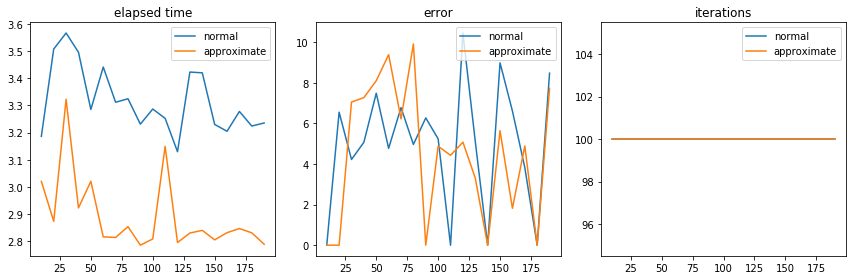

In [24]:
%%time
show_results(sample_num, elapsed_times, errors, n_iters)